## Load and Inspect the Data

In [11]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [12]:
train.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [13]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   store        230090 non-null  int64         
 2   product      230090 non-null  int64         
 3   number_sold  230090 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.0 MB


In [15]:
train.describe()

,Date,store,product,number_sold
count,230090,230090.000000,230090.000000,230090.000000
mean,2014-07-01 23:59:59.999999744,3.000000,4.500000,780.926107
min,2010-01-01 00:00:00,0.000000,0.000000,238.000000
25%,2012-04-01 00:00:00,1.000000,2.000000,722.000000
50%,2014-07-02 00:00:00,3.000000,4.500000,835.000000
75%,2016-10-01 00:00:00,5.000000,7.000000,914.000000
max,2018-12-31 00:00:00,6.000000,9.000000,1205.000000
std,NaN,2.000004,2.872288,204.096737


## 1. Descriptive Statistics per Product-Store Pair

In [18]:
desc_stats = train.groupby(['store', 'product'])['number_sold'].describe()
desc_stats

count        mean        std    min    25%    50%    75%  \
store product                                                              
0     0        3287.0  828.676909  38.402983  747.0  795.0  828.0  863.0   
      1        3287.0  738.379373  37.138921  641.0  712.0  736.0  761.0   
      2        3287.0  940.479465  51.137524  814.0  895.0  941.0  986.0   
      3        3287.0  851.493763  37.269240  750.0  822.0  851.0  883.0   
      4        3287.0  907.429267  44.673242  808.0  871.0  907.0  943.0   
...               ...         ...        ...    ...    ...    ...    ...   
6     5        3287.0  872.162762  25.773747  811.0  850.0  872.0  894.0   
      6        3287.0  950.451171  23.057999  890.0  932.0  950.0  969.0   
      7        3287.0  850.695163  20.824810  798.0  835.0  849.0  865.0   
      8        3287.0  811.315789  37.842822  710.0  777.5  811.0  845.0   
      9        3287.0  889.647703  24.672376  811.0  872.0  890.0  908.0   

                  max  
store product          
0     0         921.0  
      1         884.0  
      2        1055.0  
      3         938.0  
      4        1020.0  
...               ...  
6     5         937.0  
      6        1010.0  
      7         918.0  
      8         899.0  
      9         963.0  

[70 rows x 8 columns]

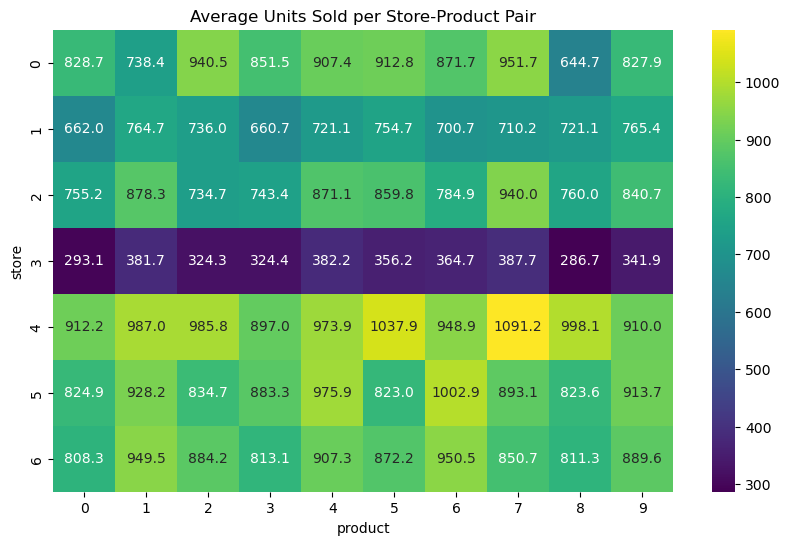

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = train.pivot_table(index='store', columns='product', values='number_sold', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis")
plt.title("Average Units Sold per Store-Product Pair")
plt.show()

## 2. Long-Term Trends

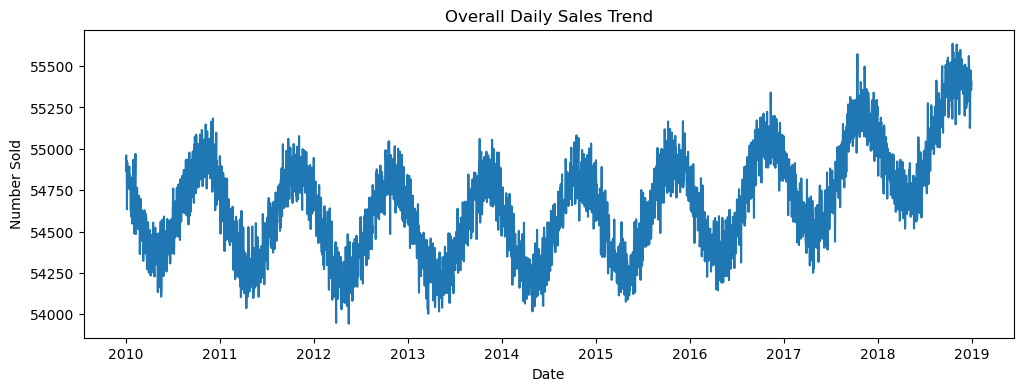

In [23]:
# Group by date to observe overall trend
daily_sales = train.groupby('Date')['number_sold'].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(daily_sales['Date'], daily_sales['number_sold'])
plt.title("Overall Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number Sold")
plt.show()

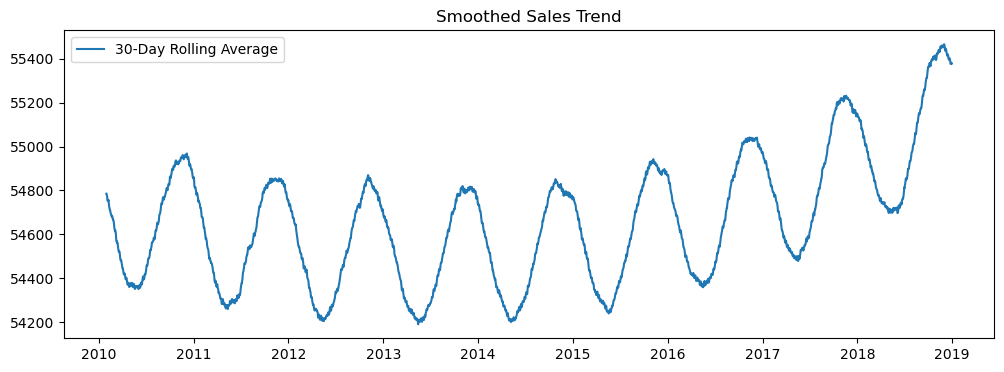

In [24]:
daily_sales['rolling_30d'] = daily_sales['number_sold'].rolling(30).mean()

plt.figure(figsize=(12, 4))
plt.plot(daily_sales['Date'], daily_sales['rolling_30d'], label="30-Day Rolling Average")
plt.title("Smoothed Sales Trend")
plt.legend()
plt.show()


## 3. Seasonality Analysis

In [29]:
train['dayofweek'] = train['Date'].dt.dayofweek
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year

dayofweek_avg = train.groupby('dayofweek')['number_sold'].mean()
monthly_avg = train.groupby('month')['number_sold'].mean()
yearly_avg = train.groupby('year')['number_sold'].mean()

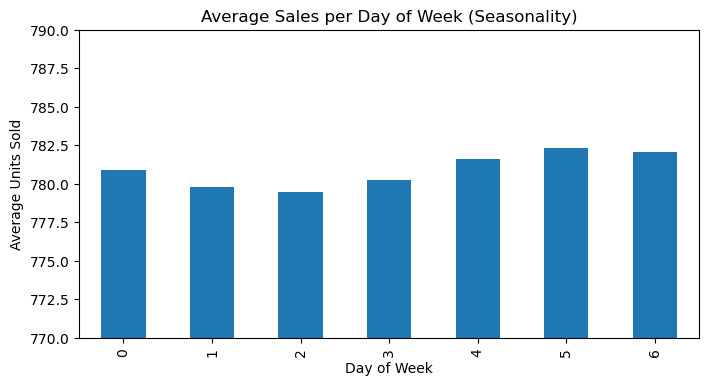

In [35]:
plt.figure(figsize=(8, 4))
dayofweek_avg.plot(kind='bar')
plt.title("Average Sales per Day of Week (Seasonality)")
plt.xlabel("Day of Week")
plt.ylabel("Average Units Sold")
plt.ylim(770, 790)
plt.show()

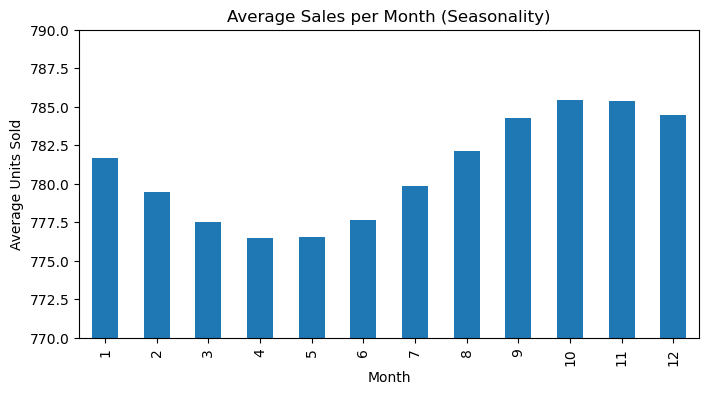

In [36]:
plt.figure(figsize=(8, 4))
monthly_avg.plot(kind='bar')
plt.title("Average Sales per Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Units Sold")
plt.ylim(770, 790)
plt.show()

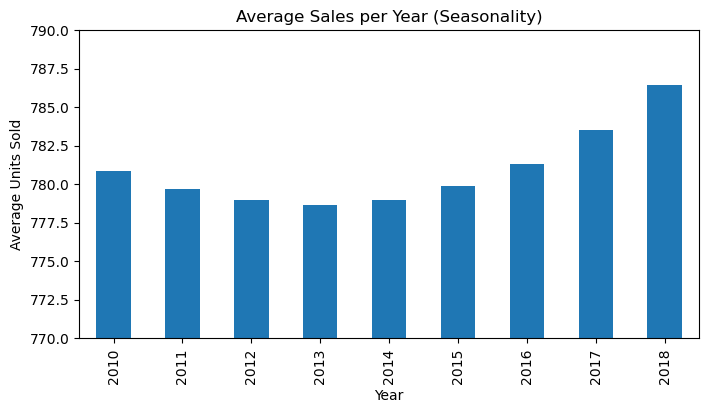

In [37]:
plt.figure(figsize=(8, 4))
yearly_avg.plot(kind='bar')
plt.title("Average Sales per Year (Seasonality)")
plt.xlabel("Year")
plt.ylabel("Average Units Sold")
plt.ylim(770, 790)
plt.show()

## 4. Store/Product-Specific Behavior

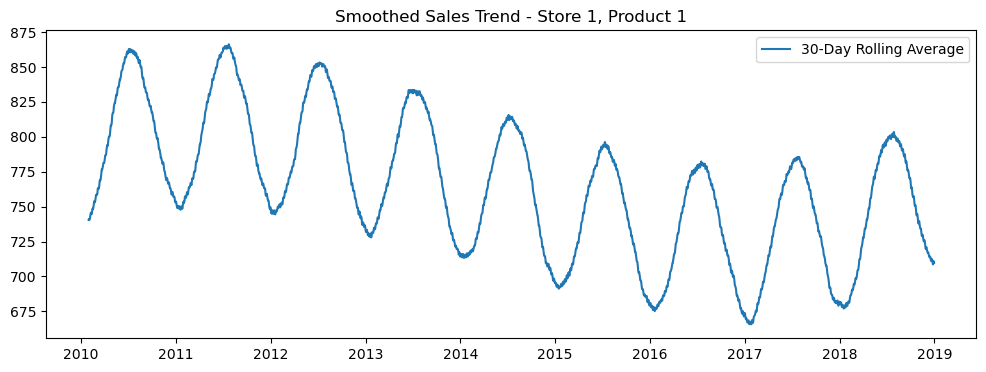

In [51]:
sample = train[(train['store'] == 1) & (train['product'] == 1)].copy()
sample['rolling_30d'] = sample['number_sold'].rolling(30).mean()

plt.figure(figsize=(12, 4))
plt.plot(sample['Date'], sample['rolling_30d'], label="30-Day Rolling Average")
plt.title("Smoothed Sales Trend - Store 1, Product 1")
plt.legend()
plt.show()

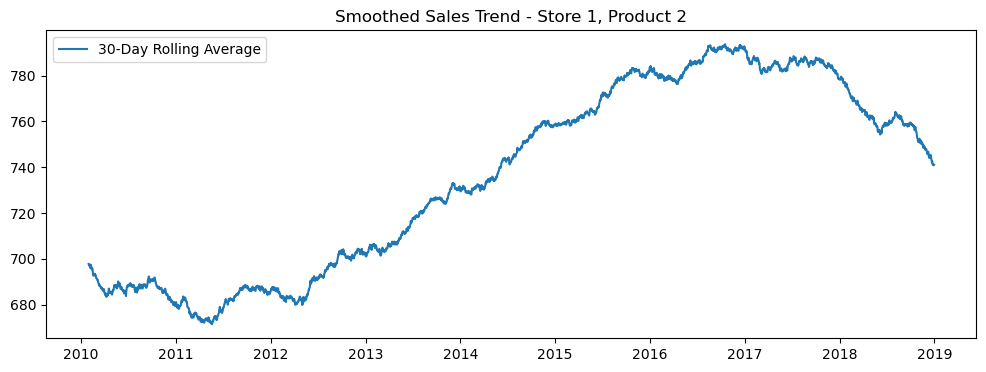

In [52]:
sample = train[(train['store'] == 1) & (train['product'] == 2)].copy()
sample['rolling_30d'] = sample['number_sold'].rolling(30).mean()

plt.figure(figsize=(12, 4))
plt.plot(sample['Date'], sample['rolling_30d'], label="30-Day Rolling Average")
plt.title("Smoothed Sales Trend - Store 1, Product 2")
plt.legend()
plt.show()